<a href="https://colab.research.google.com/github/Sudhir22/Big-Game-Prediction/blob/master/Model_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q xlrd
!git clone https://github.com/Sudhir22/Big-Game-Prediction.git

Cloning into 'Big-Game-Prediction'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [2]:
pip install catboost

     |████████████████████████████████| 64.0MB 55kB/s 


In [0]:
import pandas as pd
import xgboost as xbg
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [0]:
train_data=pd.read_csv('Big-Game-Prediction/train.csv')

In [5]:
train_data.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,6056
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,9702
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,1745
3,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,4757
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,7242


In [0]:
train_data['Team_Value']=pd.Categorical(train_data['Team_Value'])
train_data['Team_Value']=train_data['Team_Value'].cat.codes
train_data['Playing_Style']=pd.Categorical(train_data['Playing_Style'])
train_data['Playing_Style']=train_data['Playing_Style'].cat.codes
train_data['Number_Of_Injured_Players']=pd.Categorical(train_data['Number_Of_Injured_Players'])
train_data['Number_Of_Injured_Players']=train_data['Number_Of_Injured_Players'].cat.codes
train_data['Coach_Experience_Level']=pd.Categorical(train_data['Coach_Experience_Level'])
train_data['Coach_Experience_Level']=train_data['Coach_Experience_Level'].cat.codes

In [0]:
def mean_encoding(x,y):
  return float(x/y*1.0)


In [0]:
data_corr=train_data.corr()

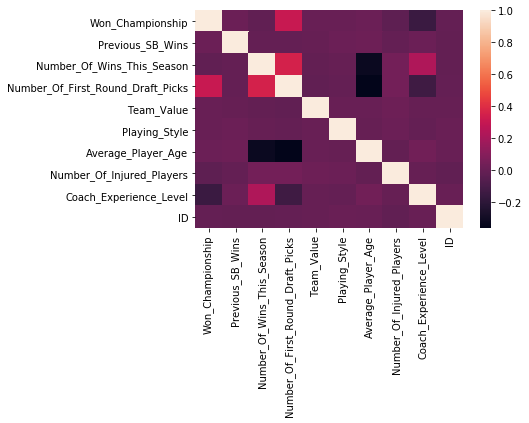

In [8]:
sns.heatmap(data_corr)

In [9]:
X=train_data.iloc[:,1:9]
X.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level
0,3,13,2,1,2,27,1,2
1,2,14,2,1,1,26,1,2
2,2,13,1,1,0,27,2,2
3,2,12,2,0,2,27,6,2
4,1,15,2,1,2,26,1,2


In [0]:
Y=train_data.iloc[:,0]

In [0]:
kf=KFold(n_splits=5)

In [0]:
param = {
    'eta': 0.2, 
    'max_depth': 12,  
    'objective': 'multi:softprob',  
    'gamma': 0.01,
    'num_class': 4} 

steps = 1000  # The number of training iterations

In [13]:
for x,y in kf.split(X):
  print(x,y)
  X_train,X_test = X.iloc[x,:],X.iloc[y,:]
  Y_train,Y_test = Y[x],Y[y]
  '''D_train = xbg.DMatrix(X_train, label=Y_train)
  D_test = xbg.DMatrix(X_test, label=Y_test)
  model = xbg.train(param, D_train, steps)
  preds = model.predict(D_test)
  best_preds = np.asarray([np.argmax(line) for line in preds])


  print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
  print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
  print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))
  print("F1-score = {}".format(f1_score(Y_test,best_preds,average='weighted')))
  print("********************************************************************")'''

  '''model1=MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000,alpha=0.01,activation='relu')
  model1.fit(X_train,Y_train)
  best_preds_nn=model1.predict(X_test)
  print("F1-score = {}".format(f1_score(Y_test,best_preds_nn,average='weighted')))'''

  '''model2=SVC(C=1,kernel='poly', degree=4,gamma='auto')
  model2.fit(X_train,Y_train)
  best_preds_svm = model2.predict(X_test)
  print(best_preds_svm.tolist().count(0))
  print(best_preds_svm.tolist().count(1))
  print(best_preds_svm.tolist().count(2))
  print(best_preds_svm.tolist().count(3))
  print("F1-score = {}".format(f1_score(Y_test,best_preds_svm,average='weighted')))'''

  '''model3=CatBoostClassifier(iterations=1000,learning_rate=0.01,depth=12,loss_function='MultiClass',verbose=False)
  model3.fit(X_train,Y_train)
  best_preds_cat=model3.predict(X_test)
  preds_cat=model3.predict_proba(X_test)
  print("F1-score = {}".format(f1_score(Y_test,best_preds_cat,average='weighted')))


  average_preds=(np.array(preds)+np.array(preds_cat))/2.0
  best_preds_average = np.asarray([np.argmax(line) for line in average_preds])
  print("F1-score = {}".format(f1_score(Y_test,best_preds_average,average='weighted')))'''

  model4=DecisionTreeClassifier()
  model4.fit(X_train,Y_train)

  best_preds_tree=model4.predict(X_test)
  print("F1-score = {}".format(f1_score(Y_test,best_preds_tree,average='binary')))


  


[1300 1301 1302 ... 6497 6498 6499] [   0    1    2 ... 1297 1298 1299]
F1-score = 0.7194244604316546
[   0    1    2 ... 6497 6498 6499] [1300 1301 1302 ... 2597 2598 2599]
F1-score = 0.7132292522596549
[   0    1    2 ... 6497 6498 6499] [2600 2601 2602 ... 3897 3898 3899]
F1-score = 0.697171381031614
[   0    1    2 ... 6497 6498 6499] [3900 3901 3902 ... 5197 5198 5199]
F1-score = 0.7379095163806553
[   0    1    2 ... 5197 5198 5199] [5200 5201 5202 ... 6497 6498 6499]
F1-score = 0.6982343499197432


In [0]:
test_data=pd.read_csv("Big-Game-Prediction/test.csv")

In [16]:
test_data.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,3,16,2,Above_Four_Billion,Relaxed,26,two,Intermediate,1
1,2,15,3,Less_Than_Four_Billion,Balanced,26,six,Advanced,5
2,2,10,1,Less_Than_Four_Billion,Balanced,27,nine,Beginner,6
3,3,14,3,Less_Than_Four_Billion,Balanced,26,seven,Intermediate,7
4,3,13,2,Less_Than_Four_Billion,Balanced,27,three,Intermediate,9


In [0]:
test_data['Team_Value']=pd.Categorical(test_data['Team_Value'])
test_data['Team_Value']=test_data['Team_Value'].cat.codes
test_data['Playing_Style']=pd.Categorical(test_data['Playing_Style'])
test_data['Playing_Style']=test_data['Playing_Style'].cat.codes
test_data['Number_Of_Injured_Players']=pd.Categorical(test_data['Number_Of_Injured_Players'])
test_data['Number_Of_Injured_Players']=test_data['Number_Of_Injured_Players'].cat.codes
test_data['Coach_Experience_Level']=pd.Categorical(test_data['Coach_Experience_Level'])
test_data['Coach_Experience_Level']=test_data['Coach_Experience_Level'].cat.codes

In [0]:
test_X=test_data.iloc[:,0:8]

In [0]:
test_X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696


In [0]:
test_X.shape

(2500, 10)

In [0]:
#D_test_test=xbg.DMatrix(test_X)
best_test_preds = model4.predict(test_X)
#best_test_preds = np.asarray([np.argmax(line) for line in test_preds])

In [0]:
test_preds.shape

(2500, 4)

In [0]:
severity_dict={1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',0:'Highly_Fatal_And_Damaging'}

In [0]:
severity_list=list()
for x in best_test_preds:
  severity_list.append(severity_dict[x])

In [0]:
test_data['Won_Championship']=pd.Series(best_test_preds)

In [0]:
test_data[['ID','Won_Championship']].to_csv("Big-Game-Prediction/submission1.csv",index=False)